###   Importing the required libraries 

In [85]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time, pickle
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.utils import np_utils

###   The CIFAR-10 images are encoded in 0-9 

In [35]:
nb_classes = 10
class_name = {
    0: 'airplane',
    1: 'automobile',
    2:  'bird',
    3:  'cat',
    4:  'deer',
    5:  'dog',
    6:  'frog',
    7:  'horse',
    8:  'ship',
    9:  'truck'
}

###  Loading  Train and Tes the dataset 

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 587s 3us/step


In [11]:
print('Training Dataset',X_train.shape)
print('train label Data',y_train.shape)
print('Test Dataset',X_test.shape)
print('Test label Data',y_test.shape)

Training Dataset (50000, 32, 32, 3)
train label Data (50000, 1)
Test Dataset (10000, 32, 32, 3)
Test label Data (10000, 1)


In [23]:
# Checking the datatype of the train and the test samples
print("X_train datatype :",X_train.dtype)
print("y_train datatype :",y_train.dtype)

X_train datatype : float32
y_train datatype : uint8


In [21]:
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
print('X_train shape: ',X_train.shape[0])
print(X_train.shape[0], 'training samples')
print(X_test.shape[0] , 'validation samples')

X_train shape:  50000
50000 training samples
10000 validation samples


### The Original Data of each image is a 32 x 32 x3 matrix of integers from 0 to 255. We need to scale it down to floats in the unit interval

In [24]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255
print("X_train Datatype: ",X_train.dtype)
print("X_test Datatype: ",X_test.dtype)

X_train Datatype:  float32
X_test Datatype:  float32


In [31]:
# Converting the labels to one-hot encoding
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print('Y_train shape: ',Y_train.shape)
print(Y_train)
print('Y_test shape: ',Y_test.shape)
print(Y_test)

Y_train shape:  (50000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
Y_test shape:  (10000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [32]:
# Viweing the image from the train dataset based on the index id
def draw_img(i):
    im = X_train[i]
    c = y_train[i]
    plt.imshow(im)
    plt.title("Class %d (%s)" %(c, class_name[c]))
    plt.axis('on')

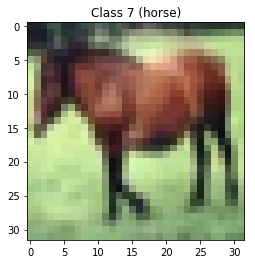

In [37]:
draw_img(7)

In [38]:
# Lets check the first 15 images in a 3x5 grid:
def draw_sample(X, y, n, rows=4, cols=4, imfile = None, fontsize = 12):
    for i in range(0,rows*cols):
        plt.subplot(rows, cols, i+1)
        im = X[n+i].reshape(32,32,3)
        plt.imshow(im, cmap = 'gnuplot2')
        plt.title("{}".format(class_name[y[n+i]]), fontsize = fontsize)
        plt.axis('off')
        plt.subplots_adjust(wspace = 0.6,hspace = 0.01)
    if imfile:
        plt.savefig(imfile)

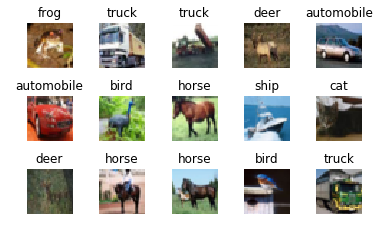

In [39]:
draw_sample(X_train, y_train, 0, 3, 5)

### Building a Simple CNN for CIFAR-10 

In [47]:
# Height and width of the iamges
IMAGE_SIZE = 32
# 3 Channels Red, Green and Blue
CHANNELS = 3

def cnn_model():
    model = Sequential() # Creating an object of Sequential
    model.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same', input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)))
    model.add(Conv2D(32,(3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
    model.add(Conv2D(64,(3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(nb_classes , activation = 'softmax'))
    
    model.summary()
    
    return model

In [48]:
# Calling the cnn_model function and saving the output in the model
model = cnn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
__________

### Train Model on the Training Data

In [50]:
#### Save the model after every epochs
checkpoint = ModelCheckpoint('best_model_simple.h5', # Model Filename
                             monitor = 'val_loss', # Quantity to monitor
                             verbose = 0, # Verbosity 0 or 1
                             save_best_only = True, # The latest best model will not be overwritten
                             mode = 'auto') # The decision to overwrite model is made automatically depending on the quantity to monitor

In [52]:
#### Configure the model for training
model.compile(
    loss = 'categorical_crossentropy', # Loss function for Neural Network
    optimizer = Adam(lr = 1.0e-4), # Adam Optimiser with 1.0e-4 Learning Rate
    metrics = ['accuracy']) # Metrics to be evaluated by the model

In [54]:
#### Fit the model on the traing Data
model_details = model.fit(X_train , Y_train,
                         batch_size = 128, # Number of Samples per gradient update
                          epochs = 100, # Number of iterations
                          validation_data = (X_test , Y_test),
                          callbacks = [checkpoint],
                          verbose = 1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 253s 5ms/step - loss: 1.9251 - acc: 0.2891 - val_loss: 1.6038 - val_acc: 0.4324
Epoch 2/100
50000/50000 [==============================] - 249s 5ms/step - loss: 1.5684 - acc: 0.4261 - val_loss: 1.4318 - val_acc: 0.4835
Epoch 3/100
50000/50000 [==============================] - 291s 6ms/step - loss: 1.4567 - acc: 0.4727 - val_loss: 1.3450 - val_acc: 0.5218
Epoch 4/100
50000/50000 [==============================] - 270s 5ms/step - loss: 1.3873 - acc: 0.5019 - val_loss: 1.2887 - val_acc: 0.5387
Epoch 5/100
50000/50000 [==============================] - 254s 5ms/step - loss: 1.3293 - acc: 0.5253 - val_loss: 1.2450 - val_acc: 0.5584
Epoch 6/100
50000/50000 [==============================] - 254s 5ms/step - loss: 1.2835 - acc: 0.5430 - val_loss: 1.1848 - val_acc: 0.5821
Epoch 7/100
50000/50000 [==============================] - 260s 5ms/step - loss: 1.2394 - acc: 0.5607 - val_loss: 1.

50000/50000 [==============================] - 253s 5ms/step - loss: 0.4745 - acc: 0.8336 - val_loss: 0.6592 - val_acc: 0.7774
Epoch 60/100
50000/50000 [==============================] - 254s 5ms/step - loss: 0.4646 - acc: 0.8355 - val_loss: 0.6758 - val_acc: 0.7736
Epoch 61/100
50000/50000 [==============================] - 254s 5ms/step - loss: 0.4574 - acc: 0.8385 - val_loss: 0.6468 - val_acc: 0.7839
Epoch 62/100
50000/50000 [==============================] - 254s 5ms/step - loss: 0.4543 - acc: 0.8387 - val_loss: 0.6494 - val_acc: 0.7805
Epoch 63/100
50000/50000 [==============================] - 692s 14ms/step - loss: 0.4489 - acc: 0.8413 - val_loss: 0.6421 - val_acc: 0.7858
Epoch 64/100
50000/50000 [==============================] - 256s 5ms/step - loss: 0.4381 - acc: 0.8433 - val_loss: 0.6445 - val_acc: 0.7856
Epoch 65/100
50000/50000 [==============================] - 255s 5ms/step - loss: 0.4347 - acc: 0.8453 - val_loss: 0.6500 - val_acc: 0.7834
Epoch 66/100
50000/50000 [======

### ------ EVALUATING THE MODEL 

### --------- Model Accuracy and Loss Plots 

In [63]:
def plot_model(model_details):

    # Create sub-plots
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_details.history['acc'])+1),model_details.history['acc'])
    axs[0].plot(range(1,len(model_details.history['val_acc'])+1),model_details.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_details.history['acc'])+1),len(model_details.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # Summarize history for loss
    axs[1].plot(range(1,len(model_details.history['loss'])+1),model_details.history['loss'])
    axs[1].plot(range(1,len(model_details.history['val_loss'])+1),model_details.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_details.history['loss'])+1),len(model_details.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    
    # Show the plot
    plt.show()

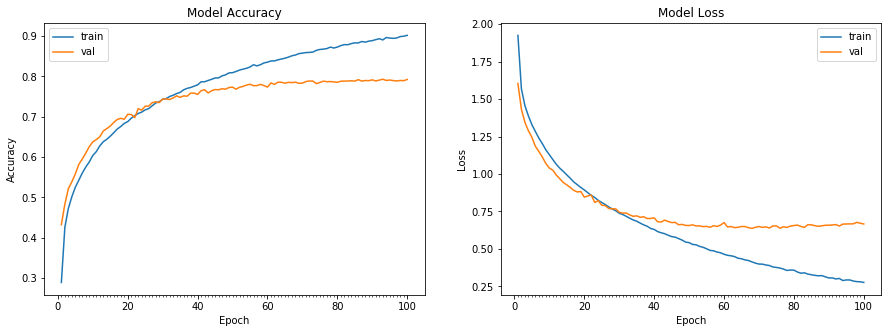

In [64]:
plot_model(model_details)

### -------- Predictions

In [66]:
# Predict the class for test set images
class_pred = model.predict(X_test,batch_size = 32)
print(class_pred[0])

[5.58133979e-05 1.68959799e-04 4.68270504e-04 6.55023098e-01
 2.39082965e-06 3.40518653e-01 3.63002555e-03 1.74091638e-05
 1.13196395e-04 2.07788025e-06]


In [70]:
# Get the index of the largest element in each vector
labels_pred = np.argmax(class_pred ,axis = 1)
print(labels_pred)

[3 8 8 ... 5 4 7]


In [71]:
# Calculating the Model Accuracy of train dataset
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.993360  ;  loss = 0.066528


In [73]:
# Calculating the Model Accuracy of test dataset
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Validation: accuracy1 = %f  ;  loss1 = %f" % (accuracy, loss))

Validation: accuracy1 = 0.792600  ;  loss1 = 0.666581


### ---- Inspecting the Output 

In [75]:
y_pred = model.predict_classes(X_test)
y_pred

array([3, 8, 8, ..., 5, 4, 7])

In [78]:
# Calculating the correctly classified and misclassified images
true_preds = [(x,y) for (x,y,p) in zip(X_test , y_test , y_pred) if y == p]
false_preds = [(x,y,p) for (x,y,p) in zip(X_test , y_test , y_pred) if y != p]

print("Number of True Predictions: ",len(true_preds))
print("Number of False Predictions: ",len(false_preds))

Number of True Predictions:  7926
Number of False Predictions:  2074


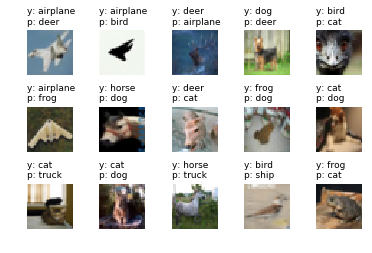

In [79]:
for i,(x,y,p) in enumerate(false_preds[0:15]):
    plt.subplot(3,5, i+1)
    plt.imshow(x, cmap = 'gnuplot2')
    plt.title("y: %s\np: %s" %(class_name[y] , class_name[p]) , fontsize = 9,loc = "left")
    plt.axis('off')
    plt.subplots_adjust(wspace = 0.6, hspace = 0.2)

## Credits 
https://github.com/09rohanchopra/cifar10/blob/master/cifar10-simple-cnn.ipynb

http://www.samyzaf.com/ML/cifar10/cifar10.html

https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py